In [ ]:
!apt update && apt install -y openslide-tools
!pip install openslide-python

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:13 http://security.ubuntu.c

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip '/content/drive/MyDrive/patient_091.zip' -d '/content/cancer_data/'

Archive:  /content/drive/MyDrive/patient_091.zip
  inflating: /content/cancer_data/patient_091_node_0.tif  
  inflating: /content/cancer_data/patient_091_node_1.tif  
  inflating: /content/cancer_data/patient_091_node_2.tif  
  inflating: /content/cancer_data/patient_091_node_3.tif  
  inflating: /content/cancer_data/patient_091_node_4.tif  


In [ ]:
from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

#Load the slide file (svs) into an object.
slide = open_slide("/content/cancer_data/patient_091_node_4.tif")

slide_props = slide.properties
print(slide_props)

<_PropertyMap {'openslide.level-count': '9', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '100352', 'openslide.level[0].tile-height': '512', 'openslide.level[0].tile-width': '512', 'openslide.level[0].width': '125952', 'openslide.level[1].downsample': '2', 'openslide.level[1].height': '50176', 'openslide.level[1].tile-height': '512', 'openslide.level[1].tile-width': '512', 'openslide.level[1].width': '62976', 'openslide.level[2].downsample': '4', 'openslide.level[2].height': '25088', 'openslide.level[2].tile-height': '512', 'openslide.level[2].tile-width': '512', 'openslide.level[2].width': '31488', 'openslide.level[3].downsample': '8', 'openslide.level[3].height': '12544', 'openslide.level[3].tile-height': '512', 'openslide.level[3].tile-width': '512', 'openslide.level[3].width': '15744', 'openslide.level[4].downsample': '16', 'openslide.level[4].height': '6272', 'openslide.level[4].tile-height': '512', 'openslide.level[4].tile-width': '512', 'openslide.level[4].

In [ ]:
print("Vendor is:", slide_props['openslide.vendor'])
print("Pixel size of X in um is:", slide_props['openslide.mpp-x'])
print("Pixel size of Y in um is:", slide_props['openslide.mpp-y'])

Vendor is: philips
Pixel size of X in um is: 0.25
Pixel size of Y in um is: 0.25


In [ ]:


# get slide dimensions for the level 0 - max resolution level
slide_dims = slide.dimensions
print(slide_dims)

(125952, 100352)


In [ ]:
slide_thumb_600 = slide.get_thumbnail(size=(600, 600))
slide_thumb_600.show()


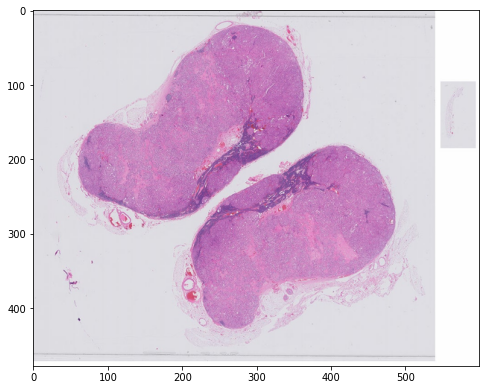

In [ ]:
slide_thumb_600_np = np.array(slide_thumb_600)
plt.figure(figsize=(8,8))
plt.imshow(slide_thumb_600_np)

In [ ]:
dims = slide.level_dimensions

In [ ]:
num_levels = len(dims)
print("Number of levels in this image are:", num_levels)

Number of levels in this image are: 9


In [ ]:
print("Dimensions of various levels in this image are:", dims)

#By how much are levels downsampled from the original image?
factors = slide.level_downsamples
print("Each level is downsampled by an amount of: ", factors)

Dimensions of various levels in this image are: ((125952, 100352), (62976, 50176), (31488, 25088), (15744, 12544), (7872, 6272), (3936, 3136), (1968, 1568), (984, 784), (492, 392))
Each level is downsampled by an amount of:  (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0)


In [ ]:
level3_dim = dims[3]

level3_img = slide.read_region((0,0), 3, level3_dim)

In [ ]:
level3_img_RGB = level3_img.convert('RGB')
level3_img_RGB.show()

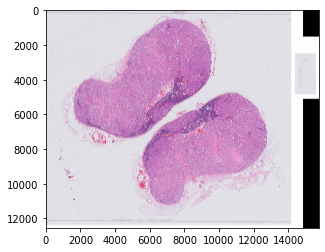

In [ ]:
level3_img_np = np.array(level3_img_RGB)
plt.imshow(level3_img_np)


In [ ]:
SCALE_FACTOR = 16
best_level = slide.get_best_level_for_downsample(SCALE_FACTOR)

In [ ]:
print(best_level)

4


In [ ]:
from openslide.deepzoom import DeepZoomGenerator

In [ ]:
tiles = DeepZoomGenerator(slide, tile_size=224, overlap=0, limit_bounds=False)

In [ ]:
print("The number of levels in the tiles object are: ", tiles.level_count)

print("The dimensions of data in each level are: ", tiles.level_dimensions)

The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 2), (4, 4), (8, 7), (16, 13), (31, 25), (62, 49), (123, 98), (246, 196), (492, 392), (984, 784), (1968, 1568), (3936, 3136), (7872, 6272), (15744, 12544), (31488, 25088), (62976, 50176), (125952, 100352))


In [ ]:
print("Total number of tiles = : ", tiles.tile_count)

#How many tiles at a specific level?
level_num = 12
print("Tiles shape at level ", level_num, " is: ", tiles.level_tiles[level_num])
print("This means there are ", tiles.level_tiles[level_num][0]*tiles.level_tiles[level_num][1], " total tiles in this level")

Total number of tiles = :  336519
Tiles shape at level  12  is:  (18, 14)
This means there are  252  total tiles in this level


In [ ]:
tile_dims = tiles.get_tile_dimensions(12, (3,12))
print(tile_dims)

(256, 64)


In [ ]:
tile_count_in_large_image = tiles.level_tiles[16] #126 x 151 (32001/256 = 126 with no overlap pixels)
#Check tile size for some random tile
tile_dims = tiles.get_tile_dimensions(16, (120,140))
#Last tiles may not have full 256x256 dimensions as our large image is not exactly divisible by 256
tile_dims = tiles.get_tile_dimensions(16, (125,150))

In [ ]:
single_tile = tiles.get_tile(16, (62, 70)) #Provide deep zoom level and address (column, row)
single_tile_RGB = single_tile.convert('RGB')
single_tile_RGB.show()

In [ ]:
cols, rows = tiles.level_tiles[12]

In [ ]:
import os
directory = "tiles"

# Parent Directory path
parent_dir = "/content/cancer_data/"

# Path
path = os.path.join(parent_dir, directory)

# Create the directory
# 'GeeksForGeeks' in
# '/home / User / Documents'
os.mkdir(path)

In [ ]:
tile_dir = "/content/cancer_data/tiles/"
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir, '%d_%d' % (col, row))
        print("Now saving tile with title: ", tile_name)
        temp_tile = tiles.get_tile(12, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        plt.imsave(tile_name + ".png", temp_tile_np)

Now saving tile with title:  /content/cancer_data/tiles/0_0
Now saving tile with title:  /content/cancer_data/tiles/1_0
Now saving tile with title:  /content/cancer_data/tiles/2_0
Now saving tile with title:  /content/cancer_data/tiles/3_0
Now saving tile with title:  /content/cancer_data/tiles/4_0
Now saving tile with title:  /content/cancer_data/tiles/5_0
Now saving tile with title:  /content/cancer_data/tiles/6_0
Now saving tile with title:  /content/cancer_data/tiles/7_0
Now saving tile with title:  /content/cancer_data/tiles/8_0
Now saving tile with title:  /content/cancer_data/tiles/9_0
Now saving tile with title:  /content/cancer_data/tiles/10_0
Now saving tile with title:  /content/cancer_data/tiles/11_0
Now saving tile with title:  /content/cancer_data/tiles/12_0
Now saving tile with title:  /content/cancer_data/tiles/13_0
Now saving tile with title:  /content/cancer_data/tiles/14_0
Now saving tile with title:  /content/cancer_data/tiles/15_0
Now saving tile with title:  /cont

In [ ]:
print(len(os.listdir('/content/cancer_data/tiles')))

252
